In [ ]:
data_dict = itstgcntry.load_data('./data/fivenodes.pkl')
loader = itstgcntry.DatasetLoader(data_dict)

In [ ]:
plans_stgcn_rand = {
    'max_iteration': 3, 
    'method': ['STGCN', 'IT-STGCN'], 
    'RecurrentGCN' : ['DCRNN'], # DCRNN, GConvLSTM, MPNNLSTM, TGCN
    'mrate': [0.8],
    'lags': [2], 
    'nof_filters': [16], 
    'inter_method': ['linear'],
    'epoch': [5]
}

In [ ]:
plnr = itstgcntry.planner.PLNR_STGCN_RAND(plans_stgcn_rand,loader,dataset_name='fivenodes')

In [ ]:
plnr.simulate()

check 

In [ ]:
lrnr = itstgcntry.StgcnLearner(train_dataset_padded)

In [ ]:
model = itstgcntry.GConvGRU_RecurrentGCN(train_dataset_padded,filters=1)

In [ ]:
lrnr.learn(model,epoch=5)

In [ ]:
model.get_parameter()

In [ ]:
lrnr1 = itstgcntry.ITStgcnLearner(train_dataset_padded)

In [ ]:
model1 = itstgcntry.GConvGRU_RecurrentGCN(train_dataset_padded,filters=1)

In [ ]:
iter_op1 = itstgcntry.GConvGRU_iter(train_dataset_padded)

In [ ]:
lrnr1.learn(model1,iter_op1,epoch=5)

check

In [49]:
lrnr = itstgcntry.StgcnLearner(train_dataset_padded)

In [50]:
model = itstgcntry.DCRNN_RecurrentGCN(train_dataset_padded,filters=1)

In [51]:
model.linear.weight

Parameter containing:
tensor([[-0.6170]], requires_grad=True)

In [52]:
model.linear.bias

Parameter containing:
tensor([-0.0424], requires_grad=True)

In [53]:
model.recurrent.bias

True

In [54]:
iter_op = itstgcntry.GConvGRU_iter(train_dataset_padded)

In [55]:
lrnr.learn(model,iter_op,epoch=10)

In [56]:
lrnr.iter_op.do_iter(model, lrnr.optimizer)

In [57]:
lrnr1 = itstgcntry.ITStgcnLearner(train_dataset_padded)

In [58]:
model1 = itstgcntry.DCRNN_RecurrentGCN(train_dataset_padded,filters=1)

In [59]:
iter_op1 = itstgcntry.GConvGRU_iter(train_dataset_padded)

In [60]:
lrnr1.learn(model1,iter_op1,epoch=10)

check

In [ ]:
lrnr = itstgcntry.StgcnLearner(train_dataset_padded)

In [ ]:
model = itstgcntry.EvolveGCNH_RecurrentGCN(train_dataset_padded)

In [ ]:
iter_op = itstgcntry.EvolveGCNH_iter(train_dataset_padded)

In [ ]:
lrnr.learn(model,iter_op,epoch=5)

In [ ]:
lrnr = itstgcntry.ITStgcnLearner(train_dataset_padded)

In [ ]:
model = itstgcntry.EvolveGCNH_RecurrentGCN(train_dataset_padded)

In [ ]:
iter_op = itstgcntry.EvolveGCNH_iter(train_dataset_padded)

In [ ]:
lrnr.learn(model,iter_op,epoch=5)

In [1]:
import itstgcntry
import torch
import itstgcntry.planner 

In [2]:
data_dict = itstgcntry.load_data('./data/fivenodes.pkl')
loader = itstgcntry.DatasetLoader(data_dict)

In [25]:
dataset = loader.get_dataset(lags=2)
train_dataset, test_dataset = itstgcntry.temporal_signal_split(dataset, train_ratio=0.8)

In [47]:
mindex = [list(range(10,100)),[],list(range(50,80)),[],[]]
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='block')
train_dataset_padded = itstgcntry.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

In [48]:
mindex = itstgcntry.rand_mindex(train_dataset,mrate=0.5)
train_dataset_miss = itstgcntry.miss(train_dataset,mindex,mtype='rand')
train_dataset_padded = itstgcntry.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

`-` 학습

In [ ]:
lrnr = itstgcntry.StgcnLearner(train_dataset_padded)

In [ ]:
model = itstgcntry.EvolveGCNO_RecurrentGCN(train_dataset_padded)

In [ ]:
iter_op = itstgcntry.EvolveGCNO_iter(train_dataset_padded)

In [ ]:
lrnr.learn(model,iter_op,epoch=50)

In [ ]:
lrnr = itstgcntry.ITStgcnLearner(train_dataset_padded)

In [ ]:
model = itstgcntry.EvolveGCNO_RecurrentGCN(train_dataset_padded)

In [ ]:
iter_op = itstgcntry.EvolveGCNO_iter(train_dataset_padded)

In [ ]:
lrnr.learn(model,iter_op,epoch=50)

`-` 적합값

In [ ]:
# lrnr(train_dataset_padded) 
# lrnr(test_dataset)['yhat'].shape

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(lrnr1(train_dataset_padded)['yhat'].reshape(-1))

- 실행하면 X,y,yhat 출력 

`-` 모형 평가 및 시각화

In [61]:
evtor = itstgcntry.Evaluator(lrnr,train_dataset_padded,test_dataset)

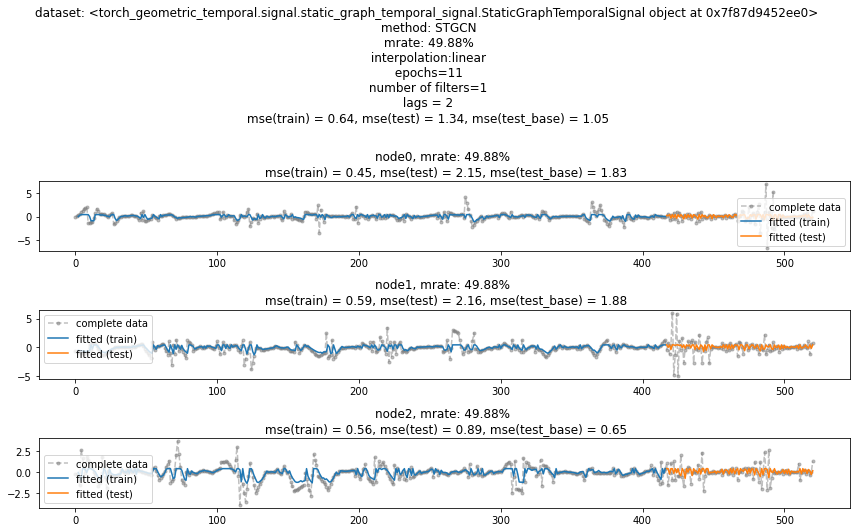

In [62]:
fig = evtor.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.tight_layout()
fig

In [63]:
evtor1 = itstgcntry.Evaluator(lrnr1,train_dataset_padded,test_dataset)

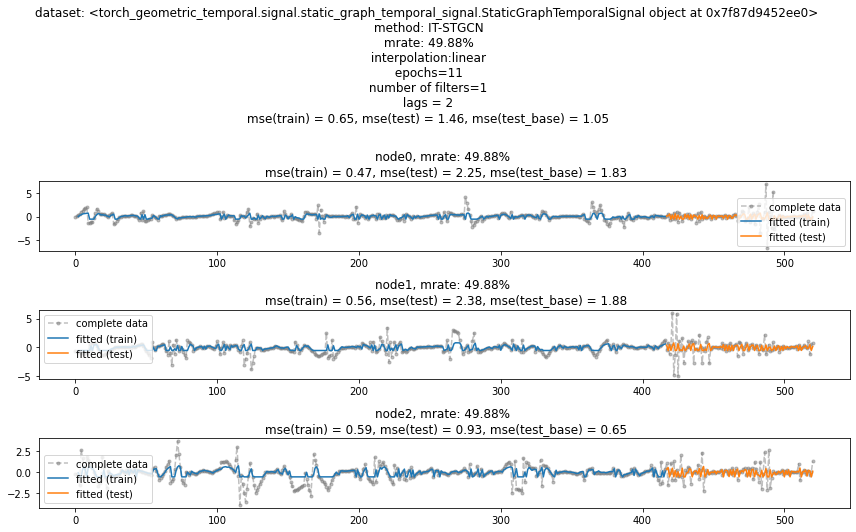

In [65]:
fig = evtor1.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.tight_layout()
fig